# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Create endpoint URL with each city
city_url = url + f'&q={cities[0]}'

    

In [4]:
# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -68.3, 'lat': -54.8},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 1.81,
  'feels_like': -3.46,
  'temp_min': 1.81,
  'temp_max': 1.81,
  'pressure': 997,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 6.69, 'deg': 250},
 'snow': {'1h': 0.32},
 'clouds': {'all': 40},
 'dt': 1695785487,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1695809370,
  'sunset': 1695854340},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [5]:

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp =  city_weather['main']['temp_max']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url =  f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Create endpoint URL with each city
    city_url = url + f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | al 'alamayn
City not found. Skipping...
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | kidal
Processing Record 9 of Set 1 | tsetserleg
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | dergachi
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | machico
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | su

In [7]:
import pandas as pd

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.81,75,40,6.69,AR,1695785487
1,puerto natales,-51.7236,-72.4875,2.85,97,100,1.09,CL,1695785557
2,port-aux-francais,-49.3500,70.2167,1.75,79,56,18.07,TF,1695785557
3,waitangi,-43.9535,-176.5597,14.34,91,20,1.34,NZ,1695785558
4,blackmans bay,-43.0167,147.3167,18.07,44,88,4.14,AU,1695785558


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,1.81,75,40,6.69,AR,1695785487
1,puerto natales,-51.7236,-72.4875,2.85,97,100,1.09,CL,1695785557
2,port-aux-francais,-49.3500,70.2167,1.75,79,56,18.07,TF,1695785557
3,waitangi,-43.9535,-176.5597,14.34,91,20,1.34,NZ,1695785558
4,blackmans bay,-43.0167,147.3167,18.07,44,88,4.14,AU,1695785558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

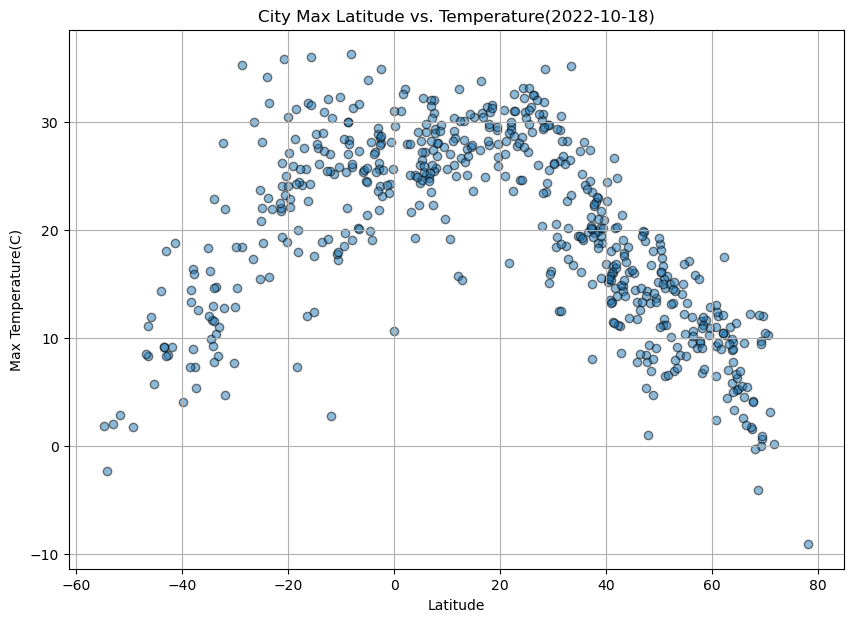

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']


plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature(2022-10-18)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

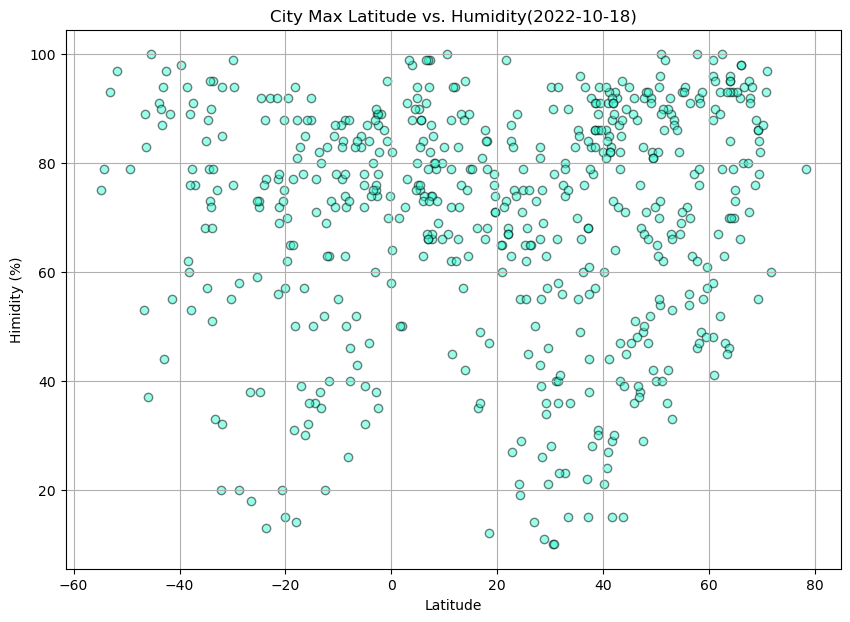

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']


plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5,c='#33FFD7')


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity(2022-10-18)")
plt.ylabel("Himidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

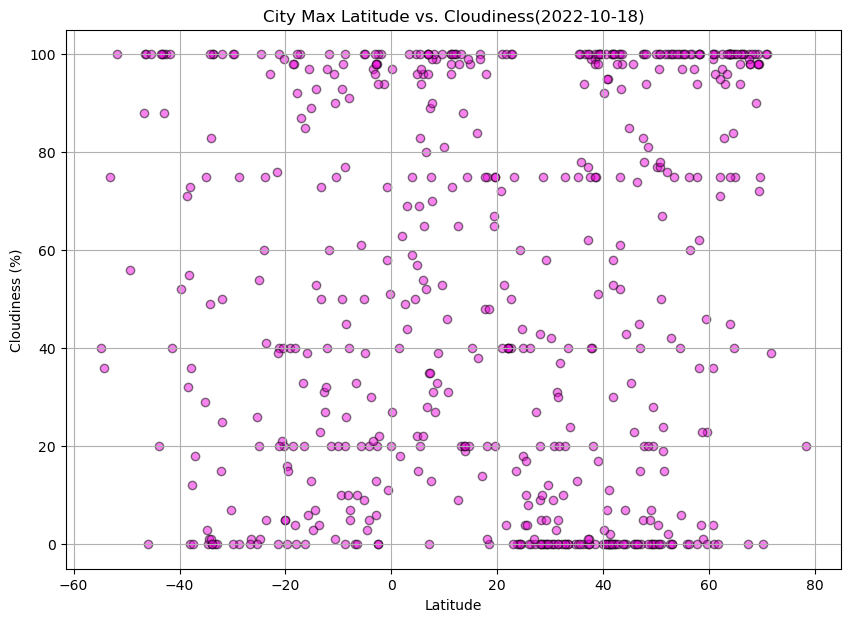

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,7))


x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5,c='#F009DF')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness(2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

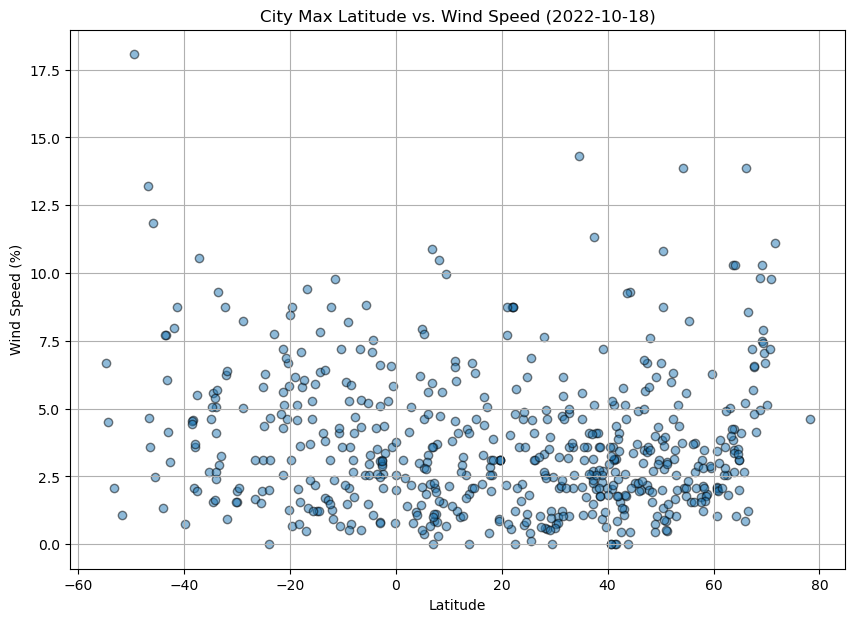

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def lin_regress(x_axis, y_axis, xt, yt, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)

    # Calculate the regression line
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the scatter plot
    plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)
    
    # Plot the regression line
    plt.plot(x_axis, regress_values, "r-")  # Fixed this line
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (x_axis.min(), y_axis.max()), fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.title(title)
    
    # Calculate and print the R-squared value
    r_squared = rvalue**2
    print(f"The r-value is: {r_squared}")

    # Display the plot (if needed)
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,qaqortoq,60.7167,-46.0333,2.37,58,4,2.11,GL,1695785558
6,kidal,18.4411,1.4078,31.54,12,0,3.88,ML,1695785559
7,tsetserleg,47.4750,101.4542,5.38,29,83,2.20,MN,1695785559
9,dergachi,51.2328,48.7659,14.58,62,19,3.04,RU,1695785559
10,badger,64.8000,-147.5333,5.20,75,100,3.09,US,1695785560


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,1.81,75,40,6.69,AR,1695785487
1,puerto natales,-51.7236,-72.4875,2.85,97,100,1.09,CL,1695785557
2,port-aux-francais,-49.3500,70.2167,1.75,79,56,18.07,TF,1695785557
3,waitangi,-43.9535,-176.5597,14.34,91,20,1.34,NZ,1695785558
4,blackmans bay,-43.0167,147.3167,18.07,44,88,4.14,AU,1695785558


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7003182720944194


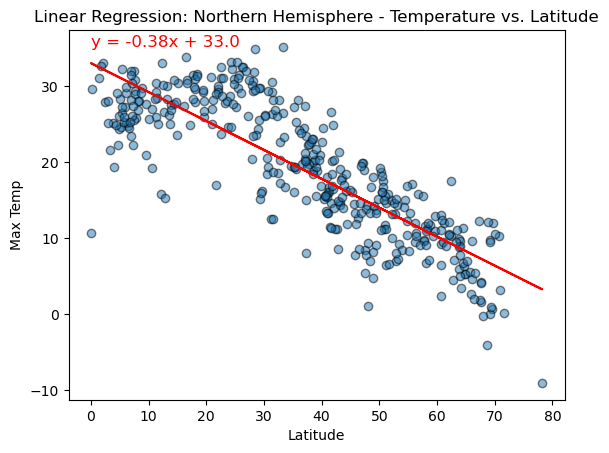

In [18]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
xt = 'Latitude'
yt = 'Max Temp'
title = 'Linear Regression: Northern Hemisphere - Temperature vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.5299784036760661


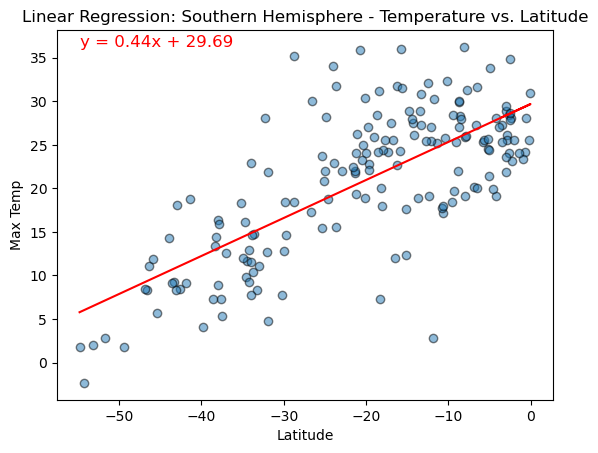

In [19]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
xt = 'Latitude'
yt = 'Max Temp'
title = 'Linear Regression: Southern Hemisphere - Temperature vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


**Discussion about the linear relationship:**

The linear relationship between temperature and latitude in the Southern Hemisphere with an r-values from the above plots of 0.70 and 0.53 suggests a moderate positive correlation between these two variables.
In summary, the positive moderate correlation between temperature and latitude in the Southern Hemisphere indicates that, in general, temperatures tend to increase as you move closer to the equator. However, it's important to recognize the complexity of climate systems and consider other factors when making predictions or drawing conclusions about temperature variations in this region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002893036546293438


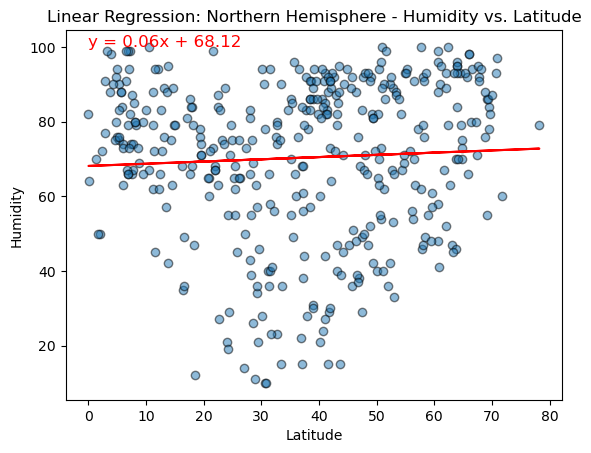

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
xt = 'Latitude'
yt = 'Humidity'
title = 'Linear Regression: Northern Hemisphere - Humidity vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


The r-value is: 0.010760804035124302


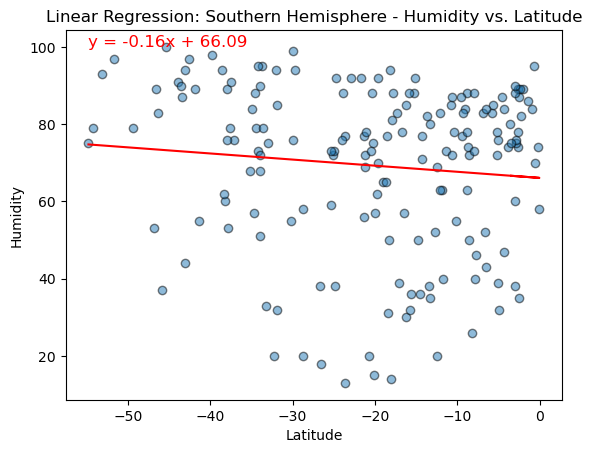

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
xt = 'Latitude'
yt = 'Humidity'
title = 'Linear Regression: Southern Hemisphere - Humidity vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


**Discussion about the linear relationship:** 

The linear relationship between humidity and latitude in the Southern Hemisphere with extremely low r-values of 0.0028 and 0.0107 suggests that there is almost no linear correlation between these two variables.
In summary, the extremely low r-value indicates that latitude is not a good predictor of humidity levels in the Southern Hemisphere. Humidity is influenced by a multitude of complex factors, and a simple linear relationship between latitude and humidity is not apparent from the data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011890406384107674


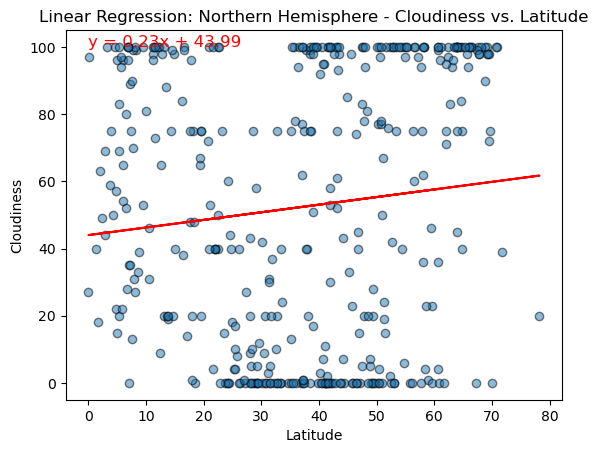

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
xt = 'Latitude'
yt = 'Cloudiness'

title = 'Linear Regression: Northern Hemisphere - Cloudiness vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.004542749108366914


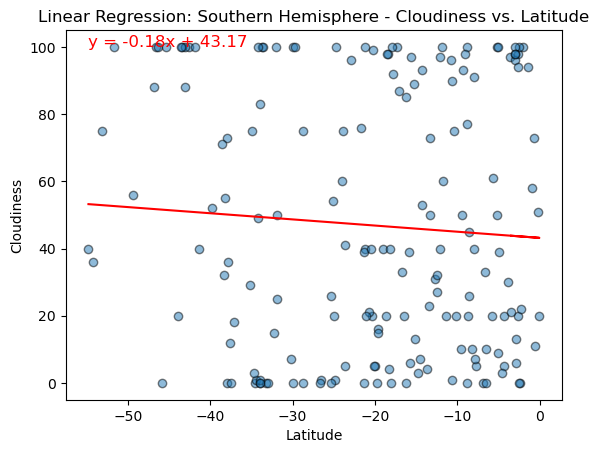

In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
xt = 'Latitude'
yt = 'Cloudiness'
title = 'Linear Regression: Southern Hemisphere - Cloudiness vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

**Discussion about the linear relationship:** 

Weak Correlation: An r-value close to zero, such as 0.0119 and 0.0045, indicates an almost complete lack of a linear relationship between cloudiness and latitude. 
This means that changes in latitude do not predict or explain variations in cloudiness in any meaningful way based on the linear model


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.026378868998129867


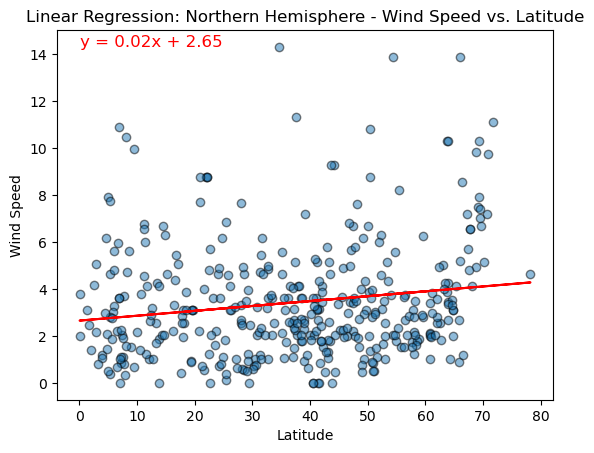

In [24]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
xt = 'Latitude'
yt = 'Wind Speed'

title = 'Linear Regression: Northern Hemisphere - Wind Speed vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.04655018113410657


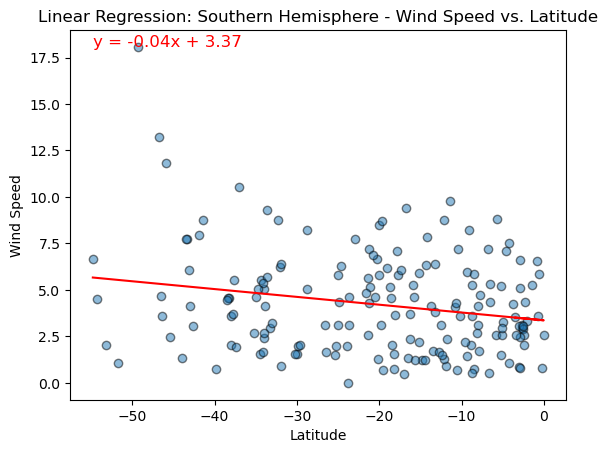

In [25]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
xt = 'Latitude'
yt = 'Wind Speed'
title = 'Linear Regression: Southern Hemisphere - Wind Speed vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

**Discussion about the linear relationship:**

Weak Correlation: An r-value close to zero, such as 0.0264 and 0.0466, indicates an almost complete absence of a linear relationship between wind speed and latitude. This means that changes in latitude do not predict or explain variations in wind speed in any meaningful way according to the linear model.
In summary, the extremely low r-value indicates that latitude is not a reliable predictor of wind speed levels. Wind speed is influenced by a multitude of complex and dynamic factors, and a simple linear relationship between latitude and wind speed is not evident from the data. 